In [78]:
# 1. Í≤∞Ï∏°Ïπò Ï†úÍ±∞
# 2. Í∞ÅÍ∞Å ÎÖÑÎèÑÎ≥ÑÎ°ú group by
# 3. Ï†ïÍ∑úÎ∂ÑÌè¨Î•º Í∑∏Î¶∞ÌõÑ ÌïòÏúÑ 30%, ÏÉÅÏúÑ 30% Í∞ÄÍ≤© Ï†úÍ±∞
# 4. Í∞ÅÍ∞ÅÏùò ÎÖÑÎèÑÎ≥ÑÎ°ú ÎÇ®ÏùÄ Îç∞Ïù¥ÌÑ∞Îì§ Ï§ëÏóêÏÑú ÌèâÍ∑† Íµ¨ÌïòÍ∏∞
# 5. ÎÖÑÎèÑÎ≥Ñ ÌèâÍ∑†Îç∞Ïù¥ÌÑ∞ plot Í∑∏Î¶¨Í∏∞

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy import stats


artist = "picasso"

fields = [
    "Oil Painting","Watercolor Painting", "Drawing", "Gouache Painting", "Print" 
]

df_fields = {}
current_dir = os.getcwd()
for field in fields:
    csv_path = os.path.join(current_dir, "..", "data/picasso_by_type", "{artist}_{field}.csv".format(artist=artist, field=field))
    df_fields[field] = pd.read_csv(csv_path)


In [17]:
df_fields

{'Drawing':              artist              title             end_date  \
 0     Pablo_Picasso   Portrait d'homme  2011-05-05T00:00:00   
 1     Pablo_Picasso  Deux nus f√©minins  2011-05-05T00:00:00   
 2     Pablo_Picasso      Femme pensive  2011-05-05T00:00:00   
 3     Pablo_Picasso          Minotaure  2011-05-05T00:00:00   
 4     Pablo_Picasso       T√™te d'homme  2011-05-05T00:00:00   
 ...             ...                ...                  ...   
 1032  Pablo Picasso                NaN  2018-11-14T07:00:00   
 1033  Pablo Picasso                NaN  2018-11-14T07:00:00   
 1034  Pablo Picasso                NaN  2018-10-19T04:30:00   
 1035  Pablo Picasso                NaN  2018-10-31T01:00:00   
 1036  Pablo Picasso                NaN  2018-10-20T03:00:00   
 
                estimate_USD     price_USD auction_site    year  \
 0     USD 250,000 - 350,000  578500.00000    Christies  1900.0   
 1       USD 60,000 - 80,000   92500.00000    Christies  1920.0   
 2       USD 20,

In [5]:
df.count()

AttributeError: 'dict' object has no attribute 'count'

In [47]:
df = df.dropna(subset=['price_USD'])
df = df.dropna(subset=['end_date'])
df.count()

artist               22
title                14
end_date             22
estimate_USD         14
price_USD            22
auction_site         22
year                 17
artwork_type         22
edition               8
height_cm            17
width_cm             17
start_date            0
low_estimate          0
high_estimate         0
price                 0
currency              0
low_estimate_USD      8
high_estimate_USD     8
estimateCurrency      8
type                 22
dtype: int64

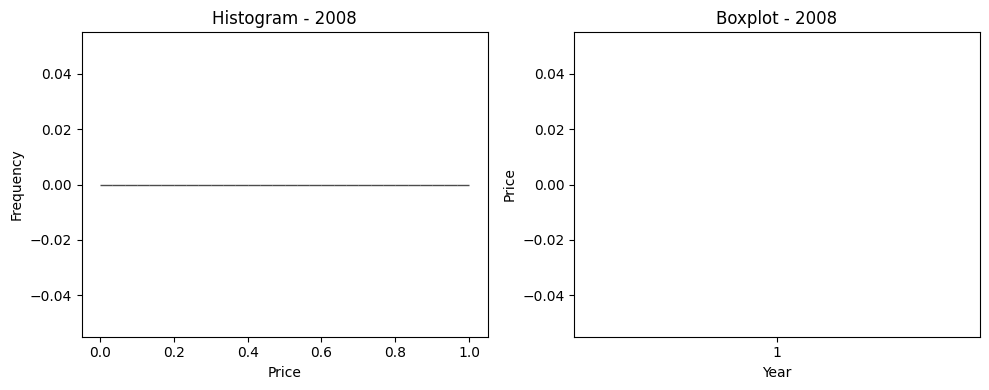

1


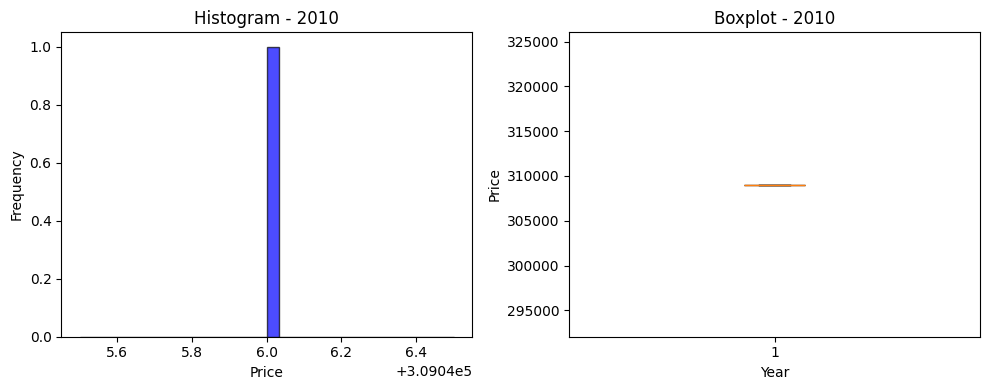

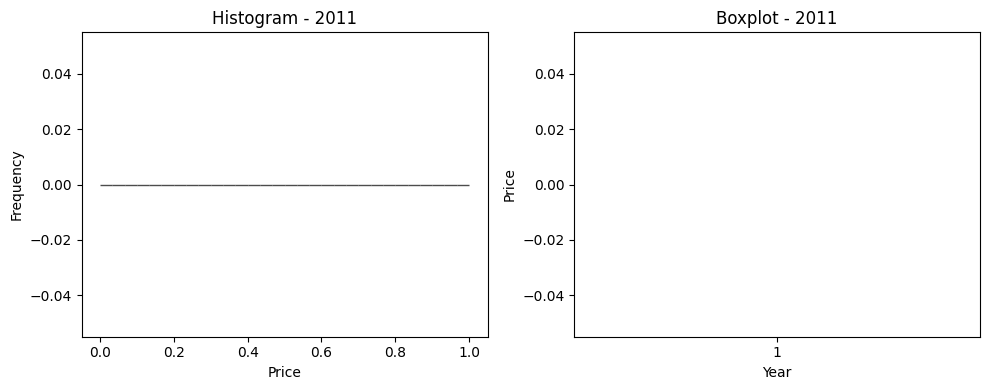

1


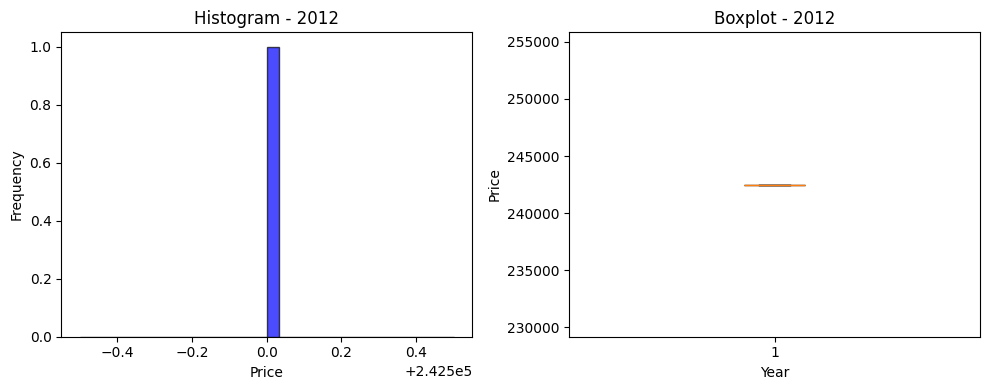

1


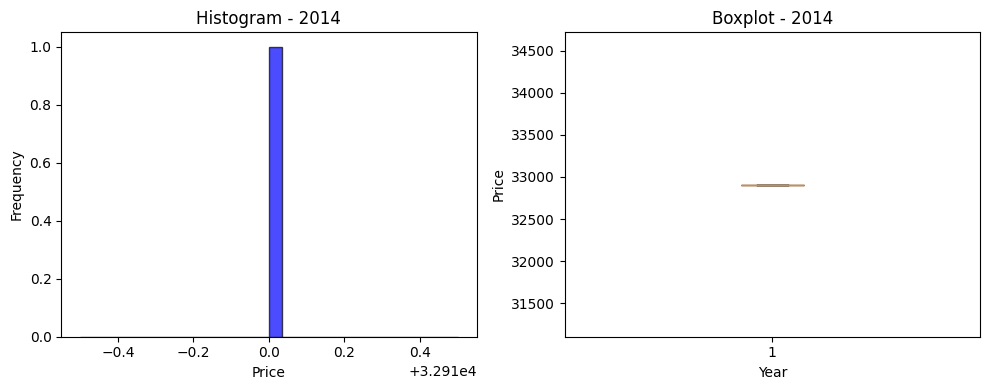

1


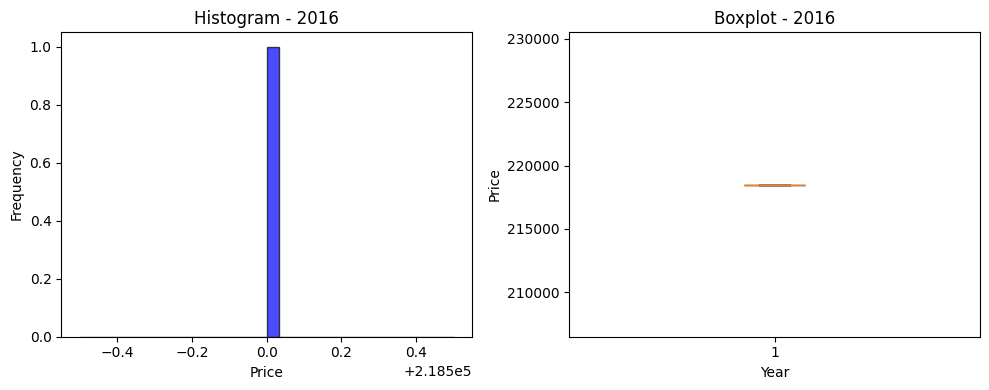

1


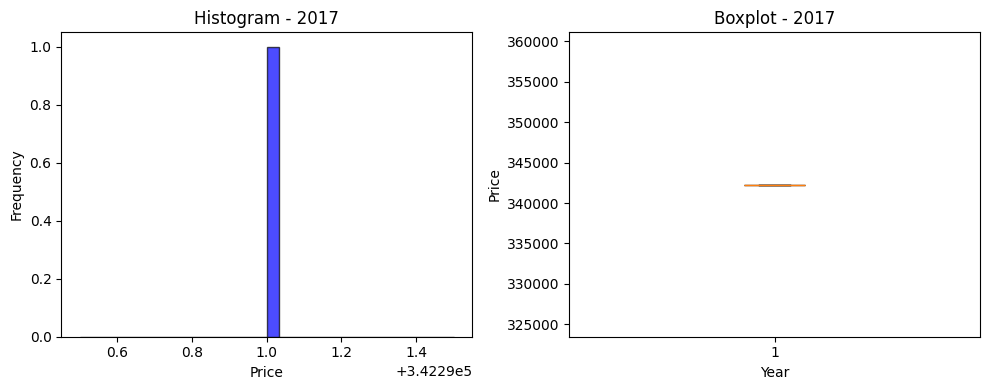

1


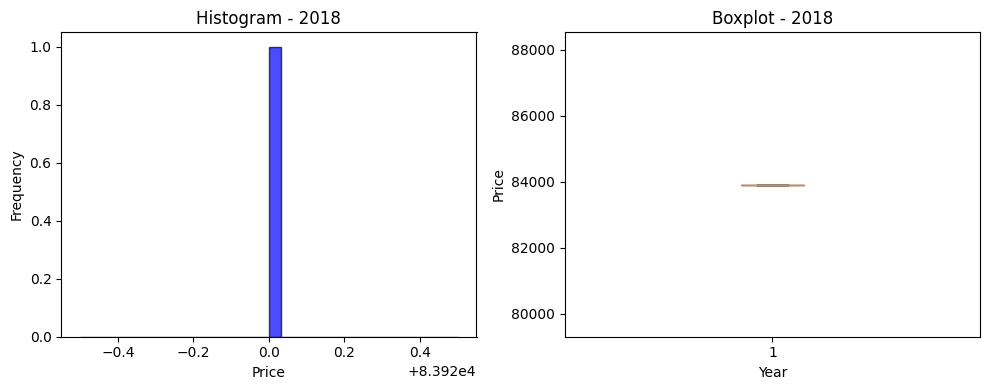

3


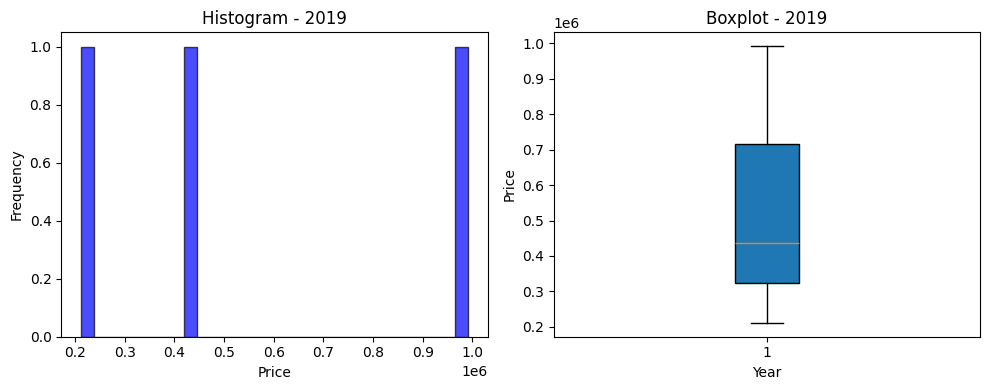

1


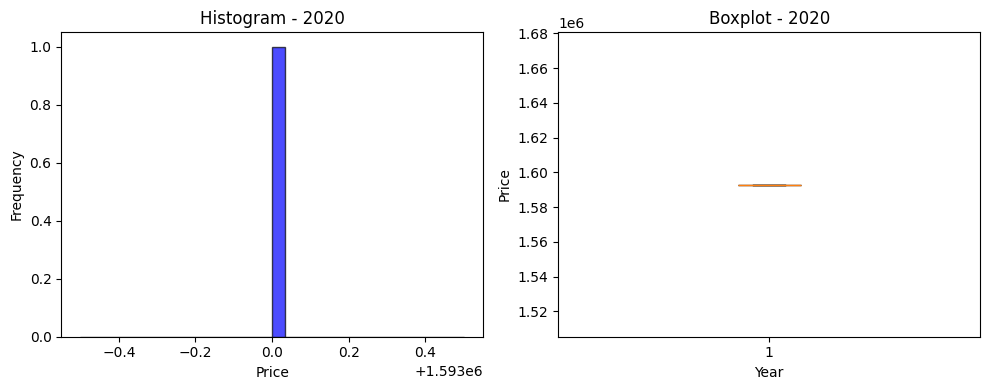

1


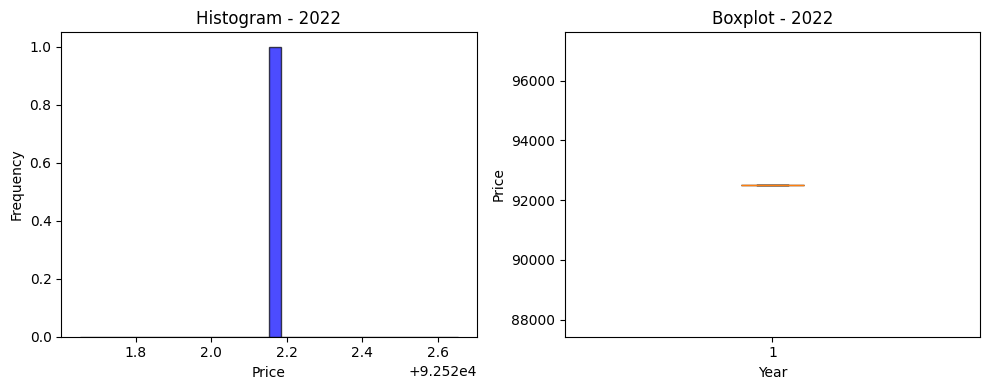

1


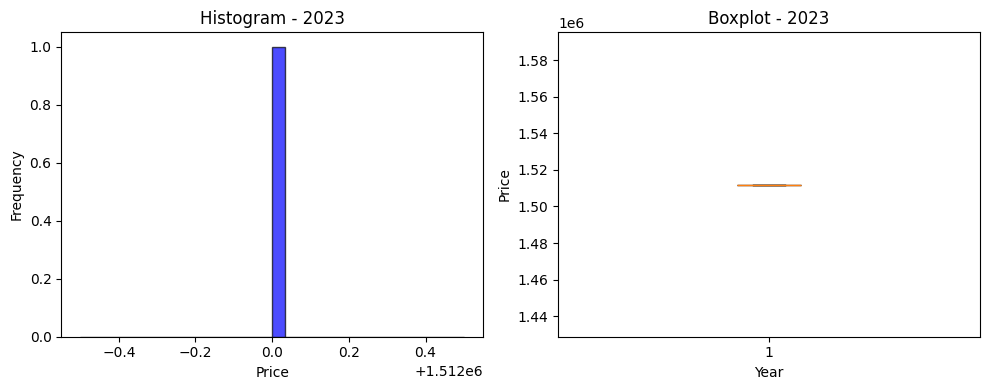

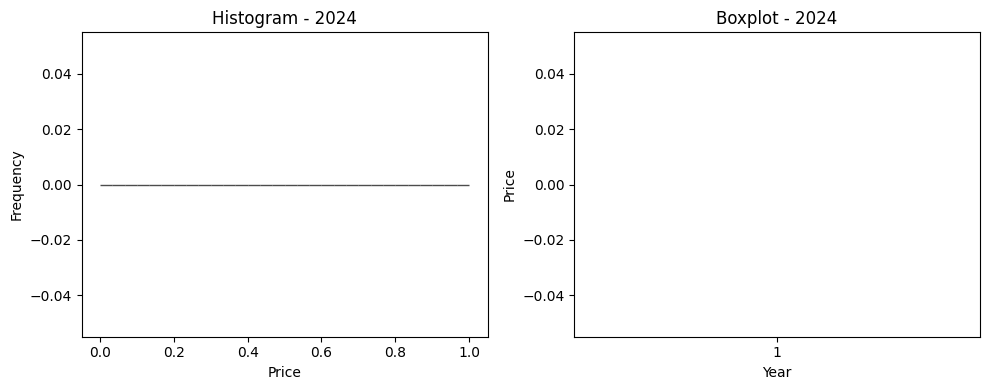

In [50]:

def getAveragePricePerYear(df):
    # # ÎÇ†ÏßúÏóêÏÑú Ïó∞ÎèÑ Ï∂îÏ∂ú (ÎÇ†Ïßú Ïª¨ÎüºÏù¥ 'date'Î°ú Í∞ÄÏ†ï)
    df['year'] = pd.to_datetime(df['end_date']).dt.year

    # # ÎÖÑÎèÑÎ≥Ñ Í∑∏Î£πÌôî
    grouped = df.groupby('year')

    average_prices = {}

    # # Í∞Å ÎÖÑÎèÑÎ≥Ñ Îç∞Ïù¥ÌÑ∞ Ï≤òÎ¶¨
    for year, group in grouped:
        prices = group['price_USD'].astype(float)  # Ïà´ÏûêÎ°ú Î≥ÄÌôò

        # Ï†ïÍ∑úÎ∂ÑÌè¨ Í∏∞Î∞ò ÌïòÏúÑ, ÏÉÅÏúÑ ÌïÑÌÑ∞ÎßÅ
        lower_bound = np.percentile(prices, 10)
        upper_bound = np.percentile(prices, 90)
        filtered_prices = prices[(prices >= lower_bound) & (prices <= upper_bound)]

        # ÎÇ®ÏùÄ Îç∞Ïù¥ÌÑ∞Ïùò ÌèâÍ∑† Í≥ÑÏÇ∞
        if not filtered_prices.empty:
            if len(filtered_prices) > 1 :
                average_prices[year] = filtered_prices.mean()
                print(len(filtered_prices))
        
        # **ÎÖÑÎèÑÎ≥Ñ Í∞ÄÍ≤© Î∂ÑÌè¨ÎèÑ Í∞úÎ≥Ñ Í∑∏Î¶¨Í∏∞**
        plt.figure(figsize=(10, 4))

        # ÌûàÏä§ÌÜ†Í∑∏Îû® (ÎπàÎèÑÏàò)
        plt.subplot(1, 2, 1)
        plt.hist(filtered_prices, bins=30, alpha=0.7, color='b', edgecolor='black')
        plt.xlabel("Price")
        plt.ylabel("Frequency")
        plt.title(f"Histogram - {year}")

        # Î∞ïÏä§ÌîåÎ°Ø (Ïù¥ÏÉÅÏπò Ìè¨Ìï®)
        plt.subplot(1, 2, 2)
        plt.boxplot(filtered_prices, vert=True, patch_artist=True)
        plt.xlabel("Year")
        plt.ylabel("Price")
        plt.title(f"Boxplot - {year}")

        plt.tight_layout()
        plt.show()

    # Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ Î≥ÄÌôò
    avg_df = pd.DataFrame(list(average_prices.items()), columns=['Year', 'Average Price'])
    return avg_df

# Ïã§Ìñâ
# average_df = getAveragePricePerYear()
avg_df = getAveragePricePerYear(df)

   Year  Average Price
0  2010   3.090460e+05
1  2012   2.425000e+05
2  2014   3.291000e+04
3  2016   2.185000e+05
4  2017   3.422910e+05
5  2018   8.392000e+04
6  2019   5.467767e+05
7  2020   1.593000e+06
8  2022   9.252215e+04
9  2023   1.512000e+06


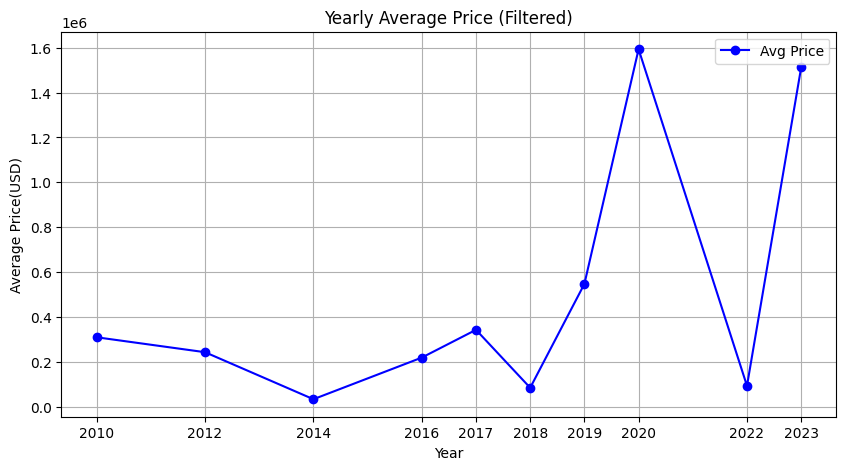

In [51]:
print(avg_df)
plt.figure(figsize=(10, 5))
plt.plot(avg_df['Year'], avg_df['Average Price'], marker='o', linestyle='-', color='b', label='Avg Price')
plt.xlabel("Year")
plt.ylabel("Average Price(USD)")
plt.title("Yearly Average Price (Filtered)")
plt.xticks(avg_df['Year'])  # üìå xÏ∂ï ÎÖÑÎèÑ Í≥†Ï†ï
plt.legend()
plt.grid(True)
plt.show()

### Ïù¥ÏÉÅÏπò Ï†úÍ±∞ÌïòÎäî Î∞©Ïãù Î≥ÄÍ≤Ω

In [34]:
df[(abs((df['price_USD']-df['price_USD'].mean())/df['price_USD'].std()))>1.96]

artist                                            title  \
77   Pablo_Picasso                 Les femmes d'Alger (Version 'O')   
78   Pablo_Picasso              Buste de femme (Femme √† la r√©sille)   
164  Pablo_Picasso                         Femme assise, robe bleue   
180  Pablo_Picasso  Femme assise pr√®s d'une fen√™tre (Marie-Th√©r√®se)   
199  Pablo_Picasso                      Nude, Green Leaves and Bust   
216  Pablo_Picasso               Portrait d'Angel Fern√°ndez de Soto   
256  Pablo_Picasso                  Fillette √† la corbeille fleurie   
336  Pablo Picasso                                              NaN   
368  Pablo Picasso                                              NaN   
379  Pablo Picasso                                              NaN   
386  Pablo Picasso                                              NaN   
415  Pablo Picasso                                              NaN   

                end_date                 estimate_USD     price_USD  \
77   2015-05-11T00:00:00          Estimate on request  1.793650e+08   
78   2015-05-11T00:00:00          Estimate on request  6.736500e+07   
164  2017-05-15T00:00:00  USD 35,000,000 - 50,000,000  4.504750e+07   
180  2021-05-13T00:00:00          Estimate on request  1.034100e+08   
199  2010-05-04T00:00:00          Estimate on request  1.064825e+08   
216  2010-06-23T00:00:00  GBP 30,000,000 - 40,000,000  5.151647e+07   
256  2018-05-08T00:00:00          Estimate on request  1.150000e+08   
336  2023-11-09T08:00:00                          NaN  1.393635e+08   
368  2022-05-18T08:00:00                          NaN  6.754100e+07   
379  2004-05-06T08:00:53                          NaN  1.041680e+08   
386  2013-02-06T07:00:00                          NaN  4.480846e+07   
415  2019-05-15T11:00:00                          NaN  5.493600e+07   

    auction_site  year   artwork_type  edition  height_cm  width_cm  \
77     Christies  2015  oil on canvas      NaN     113.98    146.37   
78     Christies  2015  oil on canvas      NaN      65.10     54.00   
164    Christies  2017  oil on canvas      NaN      73.00     60.00   
180    Christies  2021  oil on canvas      NaN     146.00    114.00   
199    Christies  2010  oil on canvas      NaN     162.00    130.00   
216    Christies  2010  oil on canvas      NaN      70.30     55.30   
256    Christies  2018  oil on canvas      NaN     154.62     66.04   
336    sotheby's  2023            oil      1.0     130.00     97.00   
368    sotheby's  2022            oil      1.0     129.90    161.70   
379    sotheby's  2004            Oil      1.0        NaN       NaN   
386    sotheby's  2013            oil      1.0        NaN       NaN   
415    sotheby's  2019            Oil      1.0        NaN       NaN   

    start_date  low_estimate  high_estimate  price currency  low_estimate_USD  \
77         NaN           NaN            NaN    NaN      NaN               NaN   
78         NaN           NaN            NaN    NaN      NaN               NaN   
164        NaN           NaN            NaN    NaN      NaN               NaN   
180        NaN           NaN            NaN    NaN      NaN               NaN   
199        NaN           NaN            NaN    NaN      NaN               NaN   
216        NaN           NaN            NaN    NaN      NaN               NaN   
256        NaN           NaN            NaN    NaN      NaN               NaN   
336        NaN           NaN            NaN    NaN      NaN               NaN   
368        NaN           NaN            NaN    NaN      NaN        60000000.0   
379        NaN           NaN            NaN    NaN      NaN        70000000.0   
386        NaN           NaN            NaN    NaN      NaN        25000000.0   
415        NaN           NaN            NaN    NaN      NaN        25000000.0   

     high_estimate_USD estimateCurrency          type  
77                 NaN              NaN  Oil Painting  
78                 NaN              NaN  Oil Painting  
164       

In [21]:
def findOutliers(x,column):
    q1 = x[column].quantile(0.25)
    q3 = x[column].quantile(0.75)
    iqr = q3 - q1
    y = x[(x[column] > (q3 + 1.5*iqr)) | (x[column] < (q1 - 1.5*iqr))]
    return len(y)

for field in fields:
    df = df_fields[field]
    print("==============================================")
    print("{field} price IQR outliers: ".format(field=field),findOutliers(df,'price_USD'))
    print("{field} price IQR outliers: ".format(field=field),findOutliers(df[(abs((df['price_USD']-df['price_USD'].mean())/df['price_USD'].std()))>1.96],'price_USD'))

Drawing price IQR outliers:  116
Drawing price IQR outliers:  0
Gouache Painting price IQR outliers:  3
Gouache Painting price IQR outliers:  0
Oil Painting price IQR outliers:  33
Oil Painting price IQR outliers:  0
Print price IQR outliers:  39
Print price IQR outliers:  0
Watercolor Painting price IQR outliers:  4
Watercolor Painting price IQR outliers:  0


## Ïó∞ÌèâÍ∑† Í∞ÄÏπò ÏÉÅÏäπÎ•†

picasso ÏßÄÏàò
Í∑∏Î¶º Ï¢ÖÎ•ò : Oil Painting
Ïó∞ÌèâÍ∑† Í∞ÄÏπò ÏÉÅÏäπÎ•†: 2.58%
Ïó∞ÌèâÍ∑† Í±∞ÎûòÎüâ : ÏïΩ 20.26Í∞ú


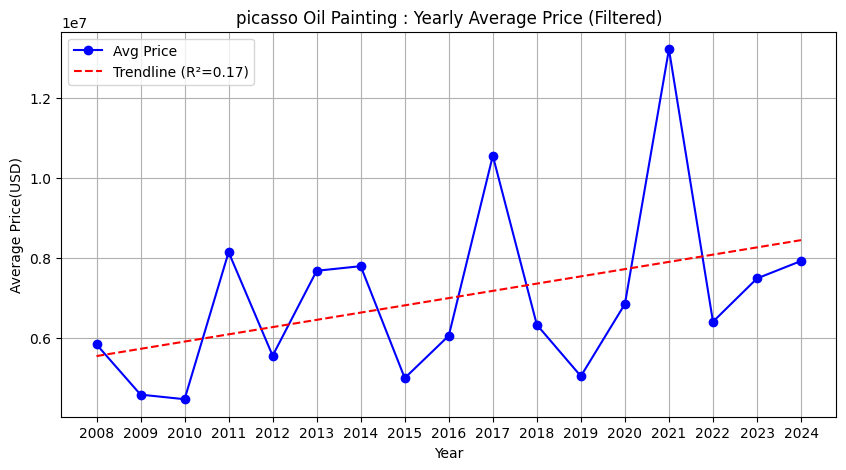

Í∑∏Î¶º Ï¢ÖÎ•ò : Watercolor Painting
Ïó∞ÌèâÍ∑† Í∞ÄÏπò ÏÉÅÏäπÎ•†: 6.04%
Ïó∞ÌèâÍ∑† Í±∞ÎûòÎüâ : ÏïΩ 1.50Í∞ú


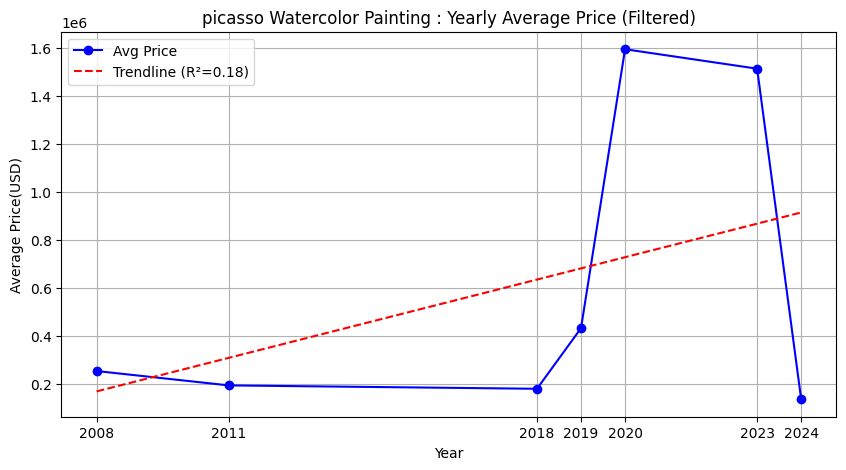

Í∑∏Î¶º Ï¢ÖÎ•ò : Drawing
Ïó∞ÌèâÍ∑† Í∞ÄÏπò ÏÉÅÏäπÎ•†: -1.64%
Ïó∞ÌèâÍ∑† Í±∞ÎûòÎüâ : ÏïΩ 52.06Í∞ú


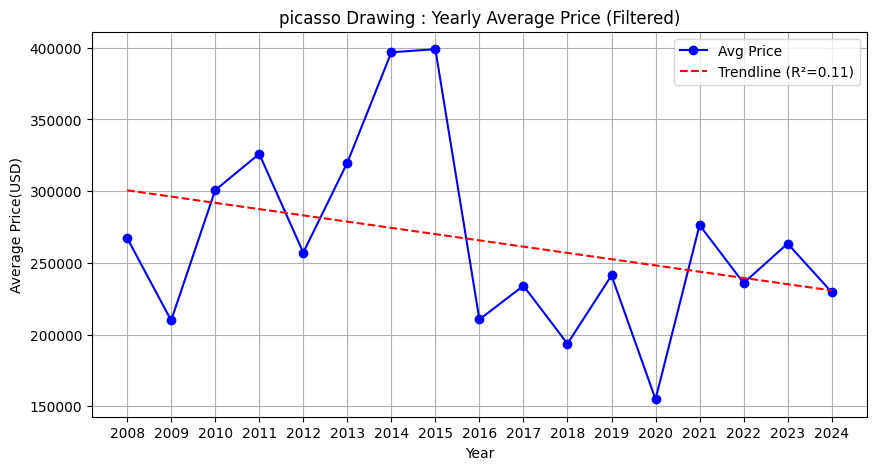

Í∑∏Î¶º Ï¢ÖÎ•ò : Gouache Painting
Ïó∞ÌèâÍ∑† Í∞ÄÏπò ÏÉÅÏäπÎ•†: -5.04%
Ïó∞ÌèâÍ∑† Í±∞ÎûòÎüâ : ÏïΩ 3.00Í∞ú


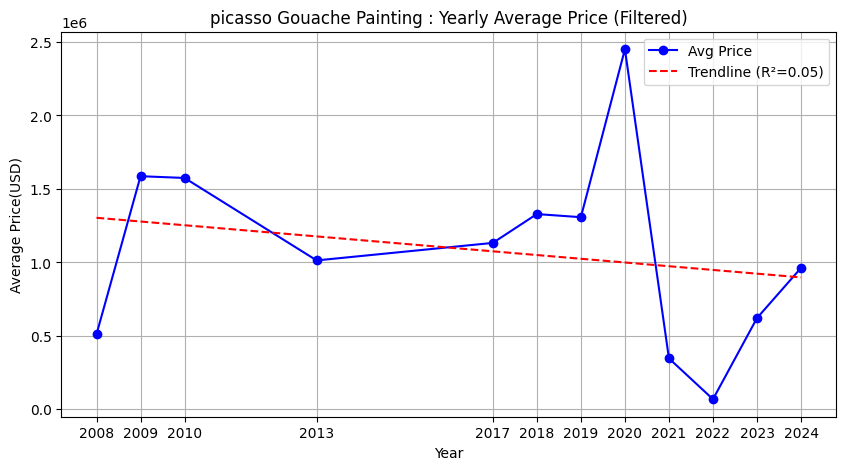

Í∑∏Î¶º Ï¢ÖÎ•ò : Print
Ïó∞ÌèâÍ∑† Í∞ÄÏπò ÏÉÅÏäπÎ•†: -8.24%
Ïó∞ÌèâÍ∑† Í±∞ÎûòÎüâ : ÏïΩ 28.85Í∞ú


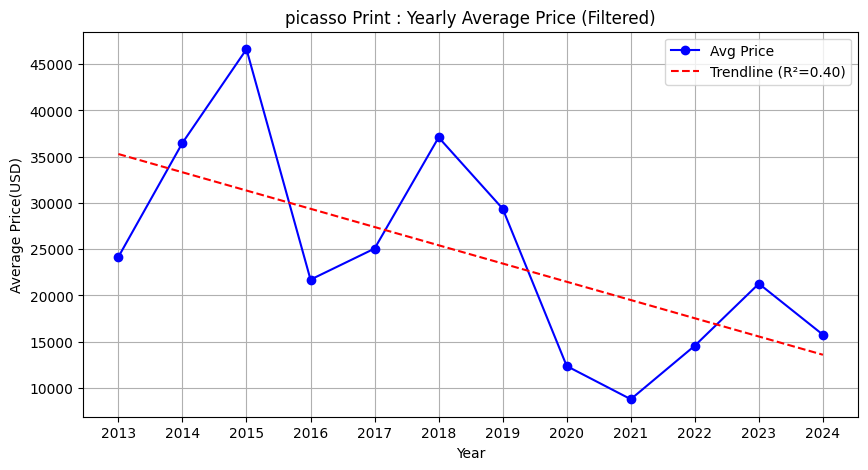

In [79]:
def getAveragePricePerYear_outlier(df, field):
    # # ÎÇ†ÏßúÏóêÏÑú Ïó∞ÎèÑ Ï∂îÏ∂ú (ÎÇ†Ïßú Ïª¨ÎüºÏù¥ 'date'Î°ú Í∞ÄÏ†ï)
    df['year'] = pd.to_datetime(df['end_date']).dt.year
    outlier = df[(abs((df['price_USD']-df['price_USD'].mean())/df['price_USD'].std()))>1.96].index
    df = df.drop(outlier)

    # # ÎÖÑÎèÑÎ≥Ñ Í∑∏Î£πÌôî
    grouped = df.groupby('year')

    yearly_counts = grouped['price_USD'].count()

    average_prices = {}

    # # Í∞Å ÎÖÑÎèÑÎ≥Ñ Îç∞Ïù¥ÌÑ∞ Ï≤òÎ¶¨
    for year, group in grouped:
        prices = group['price_USD'].astype(float)  # Ïà´ÏûêÎ°ú Î≥ÄÌôò
        if len(prices) > 1 :
            average_prices[year] = prices.mean()

    # Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ Î≥ÄÌôò
    avg_df = pd.DataFrame(list(average_prices.items()), columns=['Year', 'Average Price'])
    avg_df = avg_df.sort_values('Year')
    avg_df["Log Price"] = np.log(avg_df["Average Price"])
    # Î°úÍ∑∏ Î≥ÄÌôòÌïú Í∞íÏúºÎ°ú ÏÑ†Ìòï ÌöåÍ∑Ä Ï†ÅÏö©
    slope, intercept, r_value, p_value, std_err = stats.linregress(avg_df["Year"], avg_df["Log Price"])

    print("Í∑∏Î¶º Ï¢ÖÎ•ò : {field}".format(field=field))
    print(f"Ïó∞ÌèâÍ∑† Í∞ÄÏπò ÏÉÅÏäπÎ•†: {100 * (np.exp(slope) - 1):.2f}%")
    print("Ïó∞ÌèâÍ∑† Í±∞ÎûòÎüâ : ÏïΩ {count:.2f}Í∞ú".format(count = yearly_counts.mean()))
    return avg_df

# Ïã§Ìñâ
# average_df = getAveragePricePerYear()
print("{artist} ÏßÄÏàò".format(artist=artist))
for field in fields :
    df = df_fields[field]

    # Í≤∞Ï∏°Ïπò Ï†úÍ±∞
    avg_df_outlier = getAveragePricePerYear_outlier(df,field)
    drawGraph(avg_df_outlier)


In [31]:
def drawGraph(avg_df_outlier):
    plt.figure(figsize=(10, 5))
    plt.plot(avg_df_outlier['Year'], avg_df_outlier['Average Price'], marker='o', linestyle='-', color='b', label='Avg Price')

        # Ï∂îÏÑ∏ÏÑ† Í≥ÑÏÇ∞ Î∞è Ï∂îÍ∞Ä
    slope, intercept, r_value, p_value, std_err = stats.linregress(
        x=avg_df_outlier['Year'].astype('int'),  # Ïó∞ÎèÑ Ïà´Ïûê Î≥ÄÌôò
        y=avg_df_outlier['Average Price']
    )
    trendline = slope * avg_df_outlier['Year'] + intercept
    
    plt.plot(
        avg_df_outlier['Year'],
        trendline,
        color='red',
        linestyle='--',
        label=f'Trendline (R¬≤={r_value**2:.2f})'
    )
    
    plt.xlabel("Year")
    plt.ylabel("Average Price(USD)")
    plt.title("{artist} {field} : Yearly Average Price (Filtered)".format(artist=artist,field=field))
    plt.xticks(avg_df_outlier['Year'])
    plt.legend()
    plt.grid(True)
    plt.show()

In [33]:
        # **ÎÖÑÎèÑÎ≥Ñ Í∞ÄÍ≤© Î∂ÑÌè¨ÎèÑ Í∞úÎ≥Ñ Í∑∏Î¶¨Í∏∞**
        # plt.figure(figsize=(10, 4))

        # # ÌûàÏä§ÌÜ†Í∑∏Îû® (ÎπàÎèÑÏàò)
        # plt.subplot(1, 2, 1)
        # plt.hist(prices, bins=30, alpha=0.7, color='b', edgecolor='black')
        # plt.xlabel("Price")
        # plt.ylabel("Frequency")
        # plt.title(f"Histogram - {year}")

        # # Î∞ïÏä§ÌîåÎ°Ø (Ïù¥ÏÉÅÏπò Ìè¨Ìï®)
        # plt.subplot(1, 2, 2)
        # plt.boxplot(prices, vert=True, patch_artist=True)
        # plt.xlabel("Year")
        # plt.ylabel("Price")
        # plt.title(f"Boxplot - {year}")

        # plt.tight_layout()
        # plt.show()